**Import** **Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**upload** **dataset**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving anime.csv to anime.csv


In [5]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


**Dataset Information**

Score -> bigger value = better

Rank -> smaller value = better

Popularity -> smaller value = better

Members -> bigger value = better

Favorites -> bigger value = better


In [9]:
df.shape

(10000, 12)

In [10]:
df.columns

Index(['anime_id', 'title', 'score', 'rank', 'popularity', 'members',
       'synopsis', 'start_date', 'end_date', 'type', 'episodes', 'image_url'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


**Missing Values**

In [12]:
df.isnull().sum()

,0
anime_id,0
title,0
score,0
rank,0
popularity,0
members,0
synopsis,2
start_date,2
end_date,84
type,0


In [13]:
df.describe()

,anime_id,score,rank,popularity,members,episodes
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9952.000000
mean,24129.128000,6.980589,5000.494000,6490.903700,1.075309e+05,15.702271
std,19948.188153,0.619406,2886.898727,4646.309341,2.733514e+05,41.865696
min,1.000000,6.050000,1.000000,1.000000,2.260000e+02,1.000000
25%,4055.500000,6.470000,2500.750000,2591.750000,4.270250e+03,1.000000
50%,21406.000000,6.900000,5000.500000,5564.500000,1.817900e+04,11.000000
75%,40028.750000,7.390000,7500.250000,9824.250000,8.469275e+04,13.000000
max,62863.000000,9.290000,10000.000000,22184.000000,4.262220e+06,1787.000000


**Score Distribution**

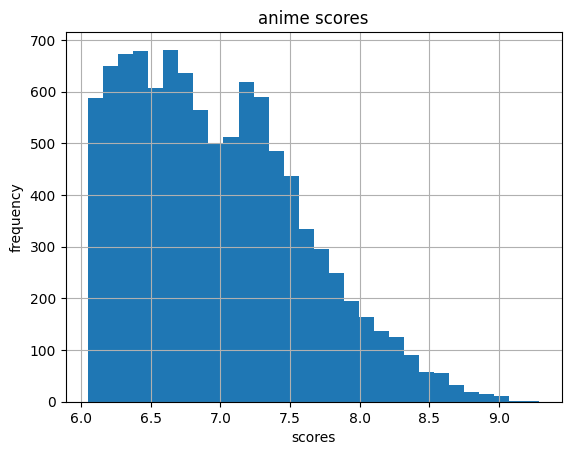

In [14]:
plt.figure()
df['score'].hist(bins=30)
plt.title("anime scores")
plt.xlabel("scores")
plt.ylabel("frequency")
plt.show()

Most anime have scores between 6 and 7.5

Very few anime have very high scores.

**Anime Type Count**

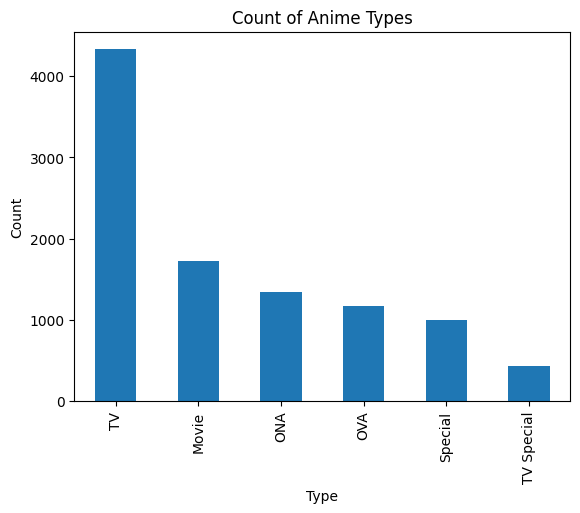

In [15]:
plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title("Count of Anime Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Most common type anime is TV

**Members Distribution**

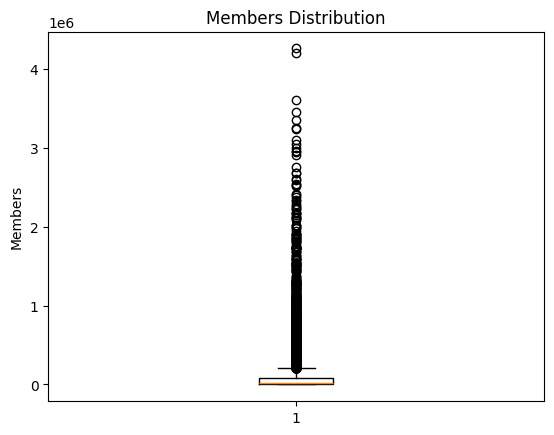

In [16]:
plt.figure()
plt.boxplot(df['members'])
plt.title("Members Distribution")
plt.ylabel("Members")
plt.show()


Many anime have low members

Few anime have extremely high members (outliers)

Popularity is uneven

**Score vs Members**

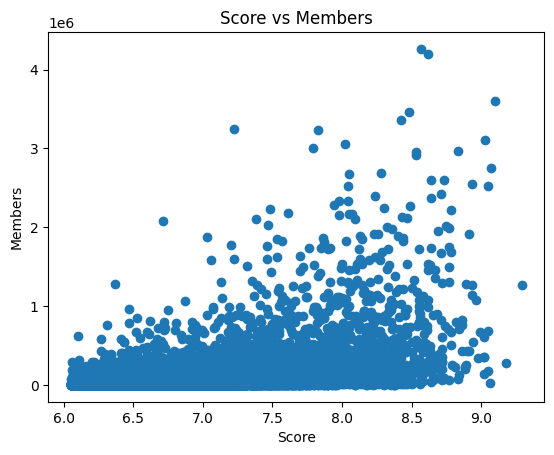

In [17]:
plt.figure()
plt.scatter(df['score'], df['members'])
plt.xlabel("Score")
plt.ylabel("Members")
plt.title("Score vs Members")
plt.show()

Moderate positive relationship

**Rank vs Popularity**

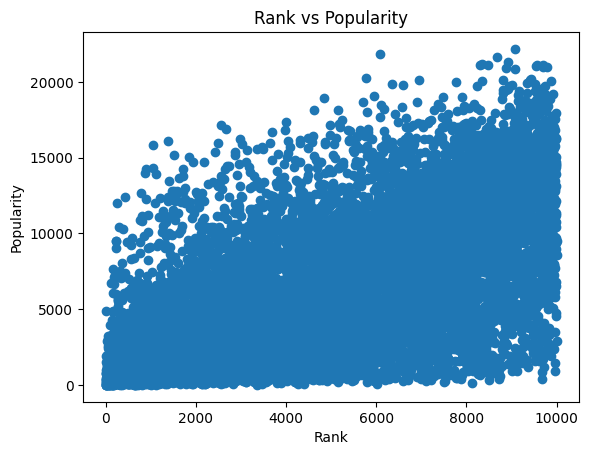

In [18]:
plt.figure()
plt.scatter(df['rank'], df['popularity'])
plt.xlabel("Rank")
plt.ylabel("Popularity")
plt.title("Rank vs Popularity")
plt.show()


strong reationship between rank and popularity

**Correlation** **Heatmap**

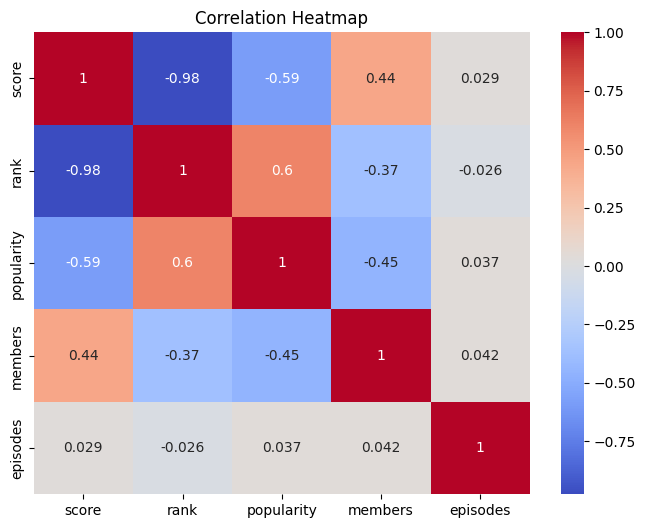

In [19]:

corr = df[['score','rank','popularity','members','episodes']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



Score & Members → Positive correlation

Rank & Popularity → Strong correlation

Episodes → Weak correlation with others

**Episodes Distribution**

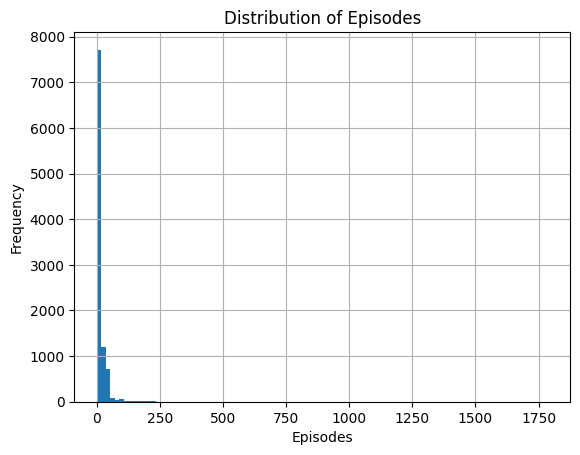

In [20]:
plt.figure()
df['episodes'].hist(bins=100)
plt.title("Distribution of Episodes")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()

Most anime have fewer episodes.

Long-running anime are rare

**Top 10 Anime**

In [21]:
top10 = df.sort_values(by='score', ascending=False).head(10)
top10[['title','score']]


,title,score
3,Sousou no Frieren,9.29
1,Chainsaw Man Movie: Reze-hen,9.18
10,Fullmetal Alchemist: Brotherhood,9.10
28,Steins;Gate,9.07
19,Kingdom 6th Season,9.06
6,Gintama: The Final,9.05
7,Shingeki no Kyojin Season 3 Part 2,9.05
0,Gintama°,9.05
2,Hunter x Hunter (2011),9.03
16,Ginga Eiyuu Densetsu,9.02


**Episodes vs Popularity**

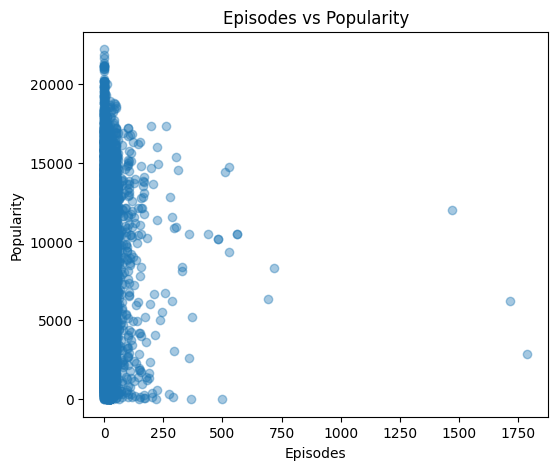

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(df['episodes'], df['popularity'], alpha=0.4)

plt.xlabel("Episodes")
plt.ylabel("Popularity")
plt.title("Episodes vs Popularity")

plt.show()


**Create duration column**

In [23]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days


**Duration vs Score**

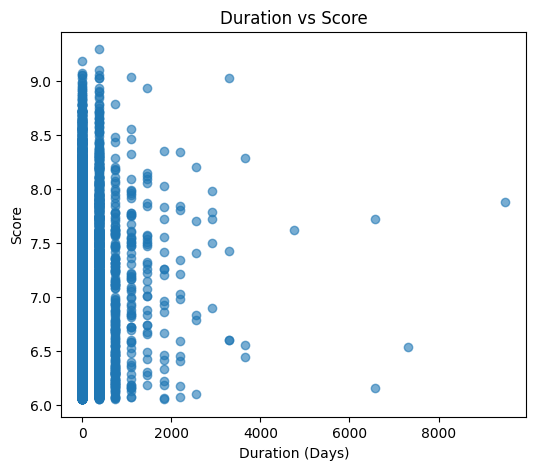

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Remove missing values
data = df[['duration_days', 'score']].dropna()

x = data['duration_days']
y = data['score']

plt.figure(figsize=(6,5))

# Scatter
plt.scatter(x, y, alpha=0.6)

plt.xlabel("Duration (Days)")
plt.ylabel("Score")
plt.title("Duration vs Score")

plt.show()


most anime run for shorter periods.

**Popularity vs Duration**

longer duration make anime more popular?

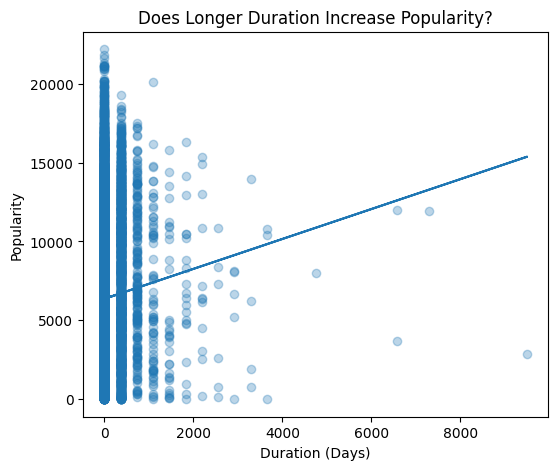

In [34]:
#remove missing values
data1 = df[['duration_days','popularity']].dropna()

x = data1['duration_days']
y = data1['popularity']

plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.3)
# trend line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Duration (Days)")
plt.ylabel("Popularity")
plt.title("Does Longer Duration Increase Popularity?")

plt.show()


longer duration -> larger popularity number

thus less popular

week relation

**Conclusion**

After performing Exploratory Data Analysis (EDA) on the Anime dataset, the following insights were observed:
1. Most anime have ratings between 6 and 8, indicating that the majority are moderately rated.
2. Score and members show a positive relationship, meaning higher-rated anime generally attract more viewers.
3. Score and rank have a strong negative correlation, since higher scores correspond to better (lower number) rankings.
4. Rank and popularity are strongly related, showing that highly ranked anime are also highly popular.
5. The number of episodes and overall duration have a weak relationship with both score and popularity.
6. Longer-running anime are not necessarily more popular or better rated.
7. Popularity and success appear to depend more on audience reception (score) rather than duration.
